Building our Training Set: 

* Input: raw, untransformed image
* this proc is very manual but there is no value in automatating this
* refined input: single parking spot 
* Output: training example with features and label that 
Second output (if possible): bin the intensities of each image --> the change in dist might be predictive
* grab raw image
* give the view a name
* run transformation on it
* define region on parking spot


In [4]:
# imports:
# imports
import os
import sys

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import skimage 
from skimage import io, color, exposure

%matplotlib inline

In [6]:
# util functions:

## cleaning functions

def rev_img(img):
    """reverse img"""
    rev_img = []
    for item in reversed(img):
        rev_cols = []
        for col in reversed(item):
            rev_cols.append(col)
        rev_img.append(rev_cols)
    return np.asarray(rev_img)

def rgb_2_gray(img):
    """converts rgb to grayscale"""
    return np.uint8(color.rgb2gray(img) * 255)

def pre_proc_img(img):
    """Wrapper to store all image cleaning logic"""
    img = rev_img(img)
    img = rgb_2_gray(img)
    return img


In [5]:
# CONSTS:

img = '/Users/nikhilarora/data/fydp/sb_images/orig/'
ds_dir = '/Users/nikhilarora/data/fydp/dataset'
img_path = os.path.join(img, 'IMG_9827.JPG')


In [7]:
# pull images into ndarrays and apply cleaning methods on them

view = pre_proc_img(io.imread(img_path))

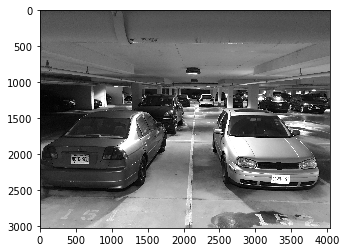

In [11]:
# view the image
plt.imshow(view, cmap='gray')

In [43]:
# spit up spots
spots = [(1700,2500,0,2000), (1700,2500,2100,4000)]
ps_view = []

In [44]:
# view the spot:
for i, spot in enumerate(spots):
    ps_view.append(view[spot[0]:spot[1],spot[2]:spot[3]])


In [45]:
print("The number of spots for view: ", len(ps_view))

The number of spots for view:  2


In [47]:
# example for each spot, flatten 
print(stats.describe(ps_view[0].flatten()))

DescribeResult(nobs=1600000, minmax=(0, 255), mean=76.478021874999996, variance=3080.5916560818055, skewness=1.1972983091737925, kurtosis=0.823124353971215)
